# IMPORTATION DES PACKAGES

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Description et visualisation du jeu de données

In [ ]:
# les fonctions definitives pour eviter de faire cellule par cellule
def description(file):
    data = pd.read_csv(file)
    print("le jeu de données contient ",data.shape[0]," lignes et ", data.shape[1]," colonnes\n")
    print("les 10 premières du jeu de données :\n")
    data.head()
    print("les différents types de données:\n")
    data.dtypes
    print("la description des données de type numériques:\n")
    data.describe()
    print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    
def visualisation (data, Y, title):
    # print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    sns.countplot(x=Y, data=data)
    plt.xlabel('Les 2 types de résultats')
    plt.ylabel('Nombre d\'occurrences')
    plt.title(title)
    plt.show()
    
    
def split(data,size,class_label):
    train_set, test_set = train_test_split(data, train_size=size, random_state=0, stratify=class_label)
    return train_set, test_set


def split_2(train_set, test_set):
    y_test = test_set["variety"]
    y_train = train_set["variety"]
    # encoder = preprocessing.LabelEncoder()
    # Y_encd = encoder.fit_transform(Y)
    x_train = train_set.iloc[:, [0, 1, 2, 3]]
    x_test = test_set.iloc[:, [0, 1, 2, 3]]
    return x_train, x_test, y_train, y_test


def preprocessing(data):
    data_clean = data.copy()
    for col in data_clean.select_dtypes(['int','float']).columns:
        print(col)
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
        data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]
    return(data_clean)

def encodage():
    pass

In [ ]:
data = pd.read_csv("Medicaldataset.csv")
data.head()

### Descriptif des données

In [ ]:
print(data['Gender'].value_counts())
print(data['Heart rate'].value_counts())
print(data['Systolic blood pressure'].value_counts())
print(data['Diastolic blood pressure'].value_counts())
print(data['Blood sugar'].value_counts())
print(data['CK-MB'].value_counts())
print(data['Troponin'].value_counts())

| Nom de la variable       | Description                                                      |
|--------------------------|------------------------------------------------------------------|
| Hearth rate              | BPM (battements par minute) du coeur                             |
| Systolic blood pressure  | Pression maximale (tension) au moment de la contraction du coeur |
| Diastolic blood pressure | Pression minimale au moment du relâchement du coeur              |
| Blood sugar              | Glycémie (taux de glucose dans le sang)                          |
| CK-MB                    | Quantité de créatine kinase dans le sang                         |
| Troponin                 | Quantité de protéine Troponine (contraction musculaire)          |

Kmeans  
Clustering hierarchique aglomérative  
DBSCan  
HDBscan

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
# inutile
round(data["Result"].value_counts(normalize=True),2)
round(data["Troponin"].value_counts(),2)

In [ ]:
# test de visuel
data.dtypes.value_counts().plot.pie()

In [ ]:
plt.scatter(data["Diastolic blood pressure"],data["Age"])
plt.xlabel("Diastolic blood pressure")
plt.ylabel("Age")
plt.title("Scatter plot for diastolic pressure by age")

In [ ]:
sns.scatterplot(data=data, x="Systolic blood pressure", y="Age", hue=data["Result"])
plt.title("Scatter plot of systolic pressure by age")

### Corrélation entre les variables

In [ ]:
df_features_only = data.drop(columns=['Result'])

# Calculer la matrice de corrélation
correlation_matrix = df_features_only.corr()

# Filtrer les caractéristiques ayant une corrélation significative entre elles
relevant_features = correlation_matrix.abs().sum(axis=1).sort_values(ascending=False).index[:8]
df_subset = data[relevant_features]
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques pertinentes (sans la colonne Result)')
plt.show()

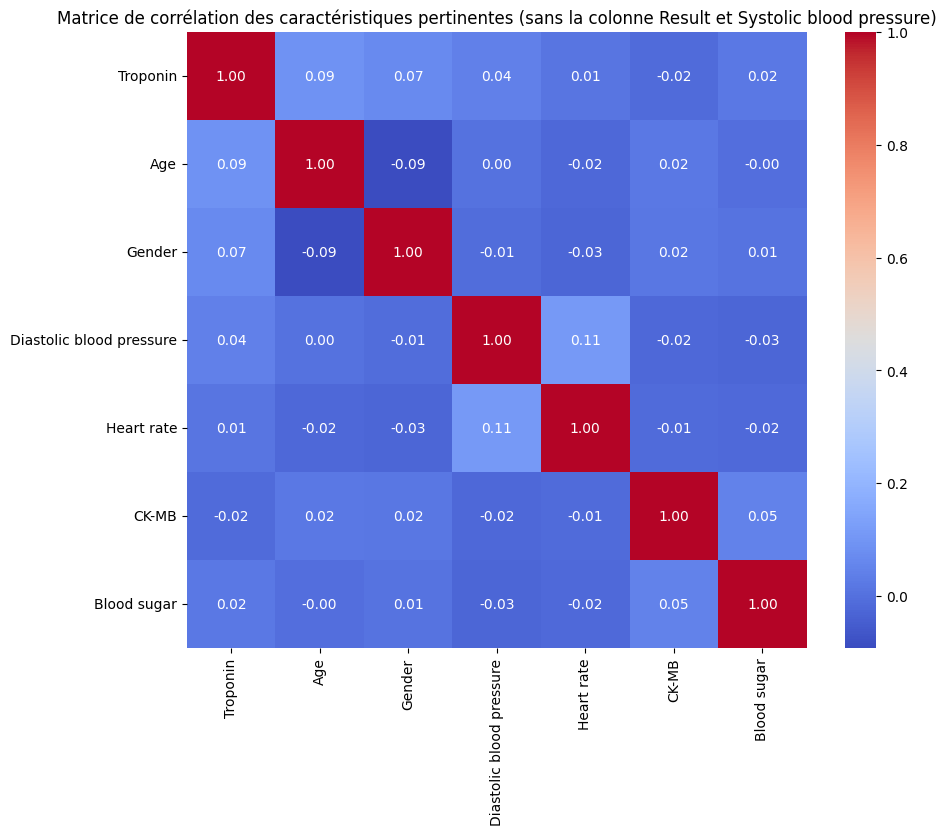

In [12]:
df_features_only = data.drop(columns=['Result','Systolic blood pressure'])

# Calculer la matrice de corrélation
correlation_matrix = df_features_only.corr()

# Filtrer les caractéristiques ayant une corrélation significative entre elles
relevant_features = correlation_matrix.abs().sum(axis=1).sort_values(ascending=False).index[:8]
df_subset = data[relevant_features]
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques pertinentes (sans la colonne Result et Systolic blood pressure)')
plt.show()

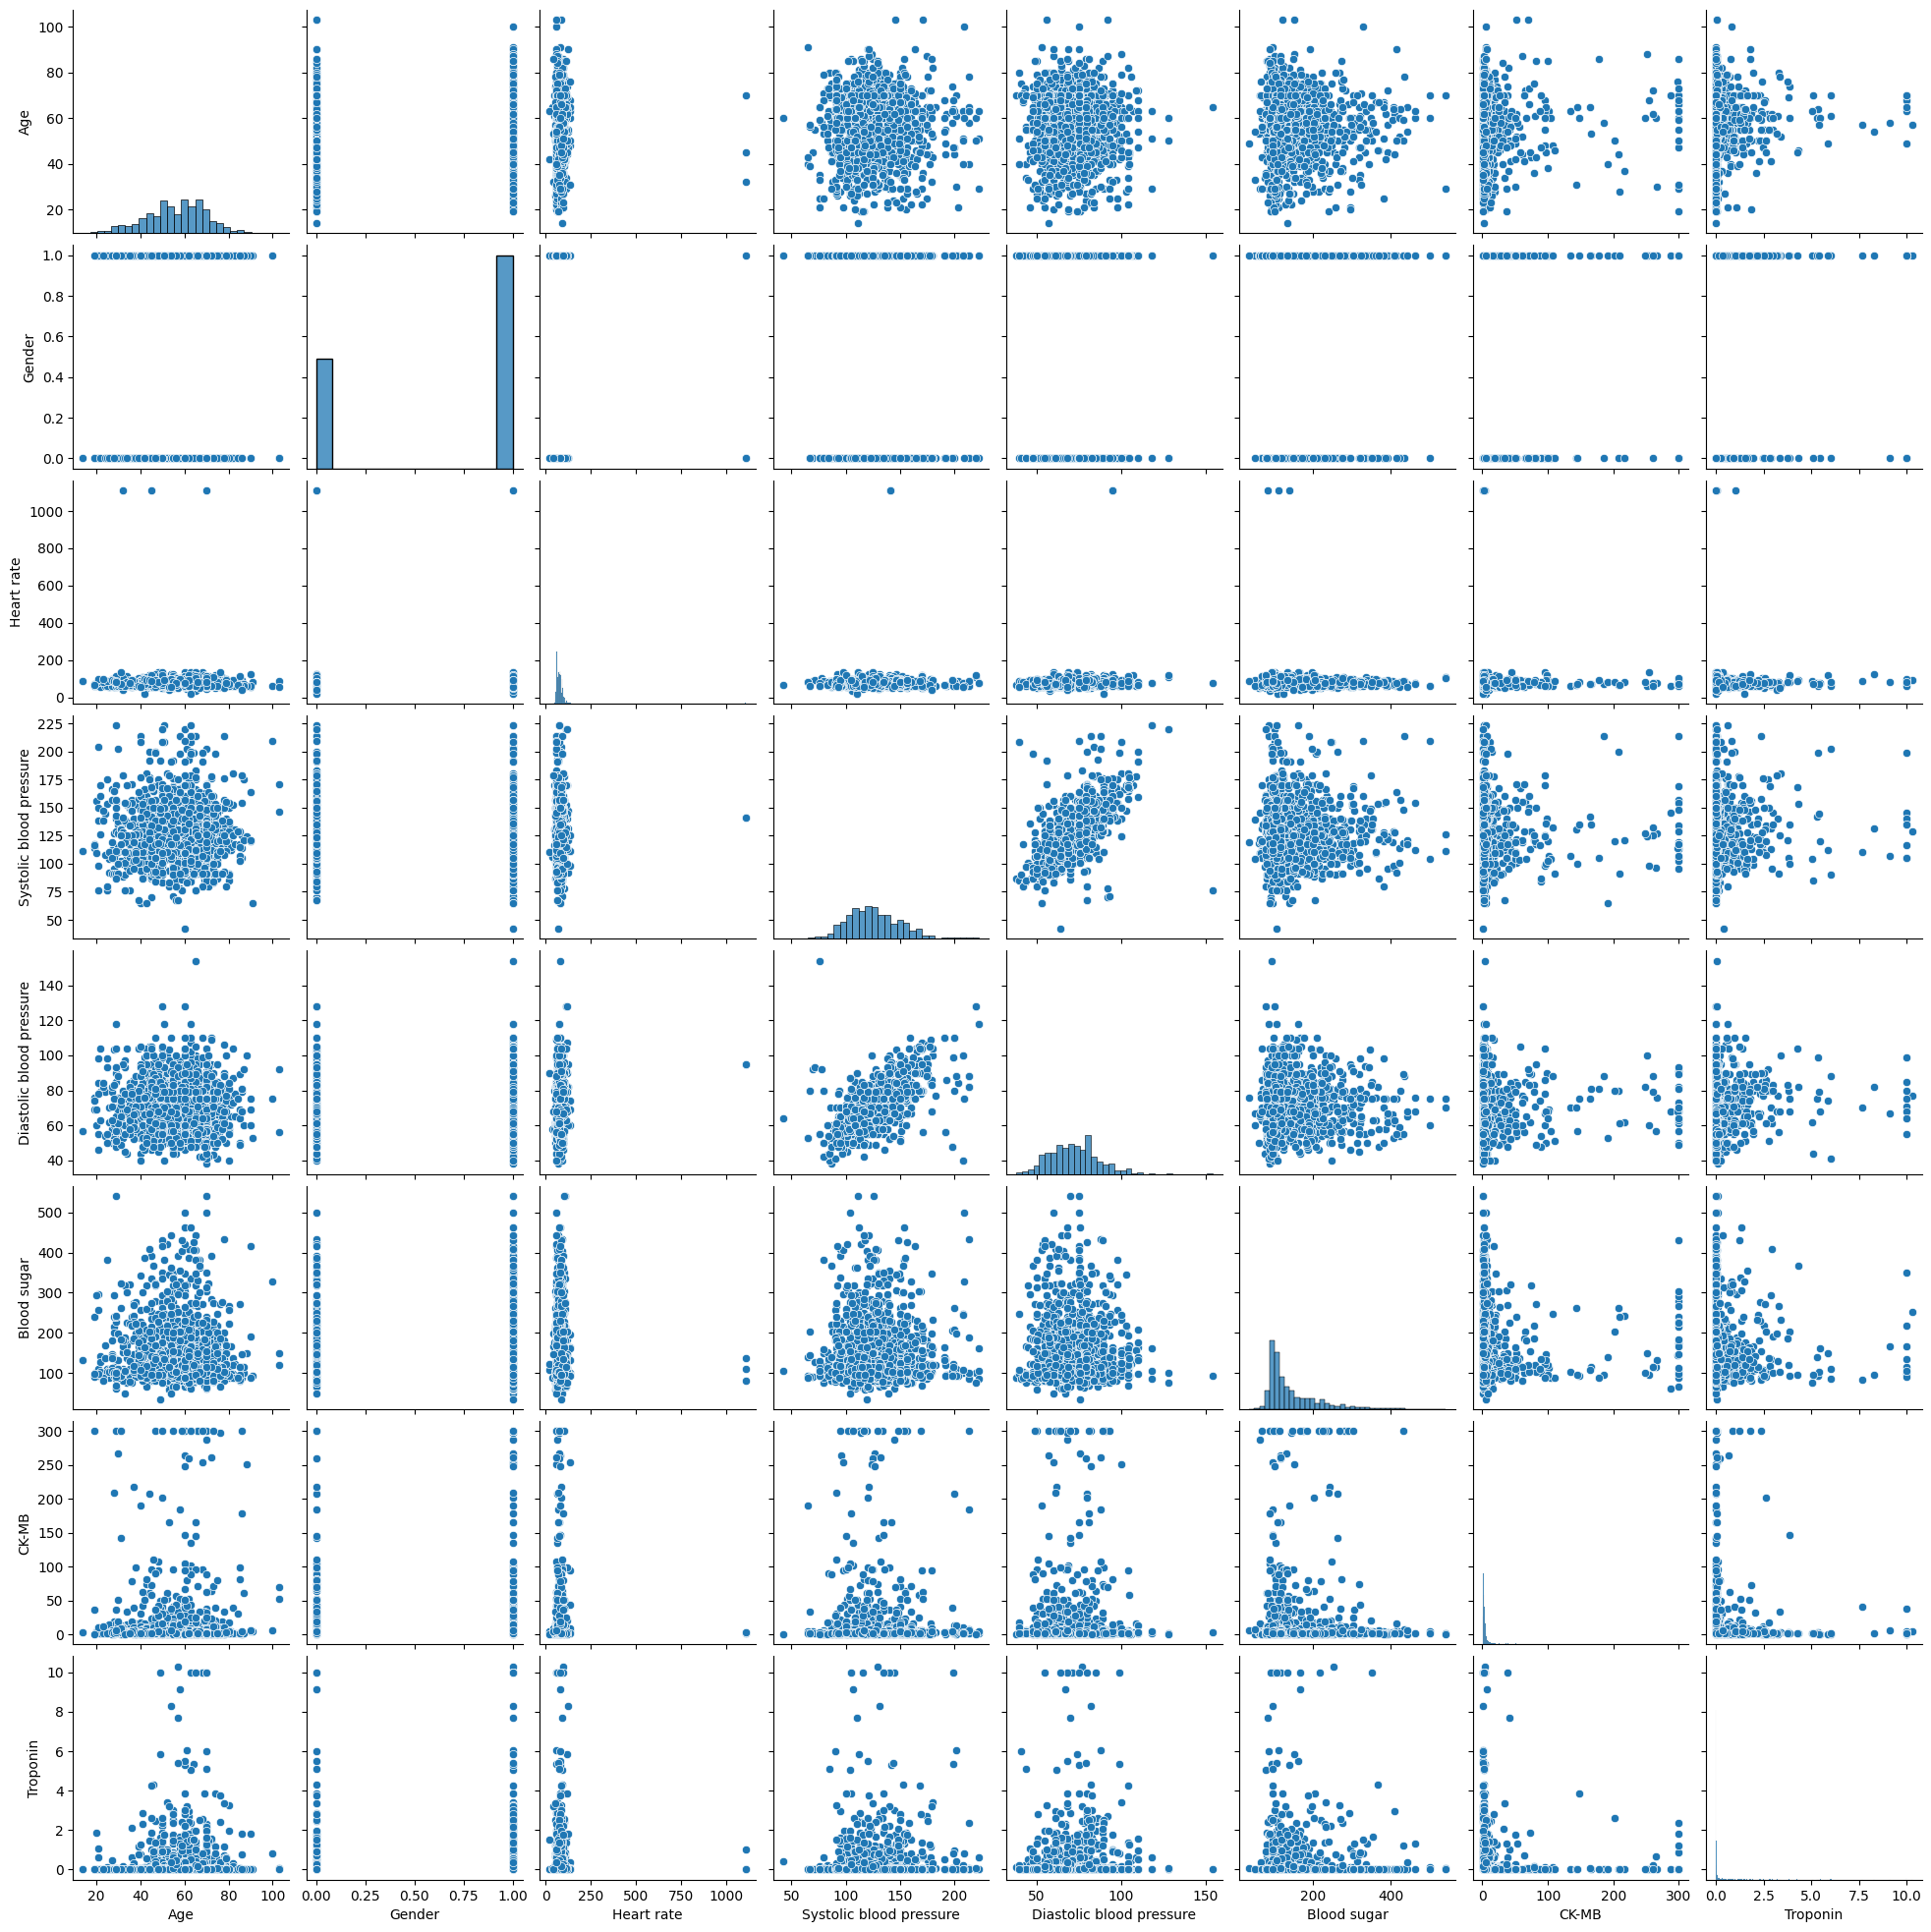

In [13]:
sns.pairplot(data)

<Axes: >

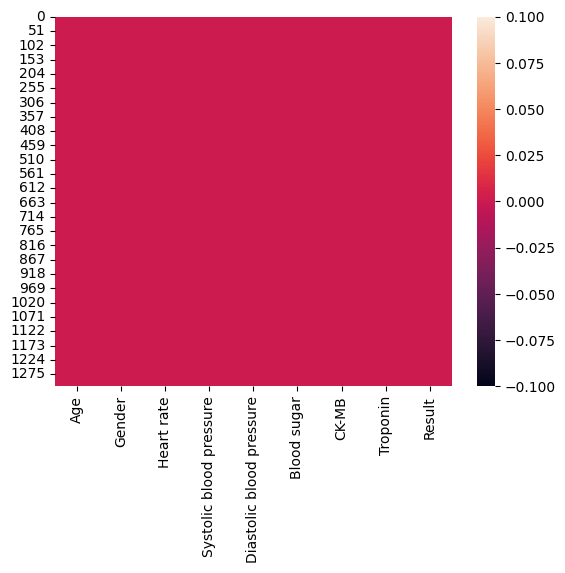

In [14]:
# inutile
sns.heatmap(data.isna())

## Analyse univariée

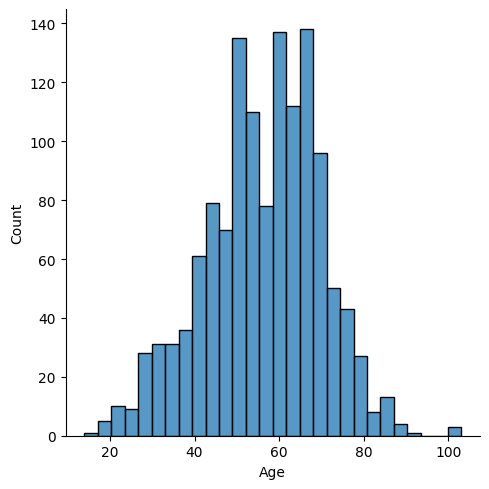

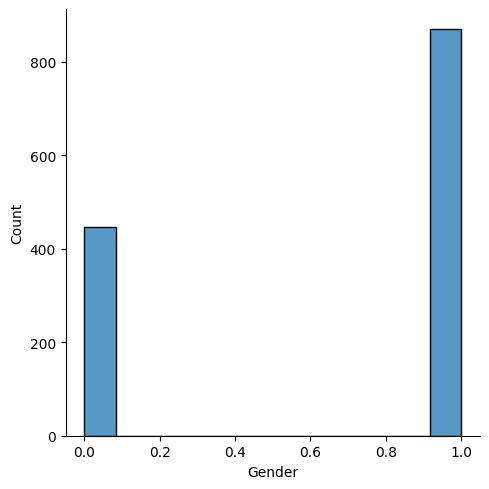

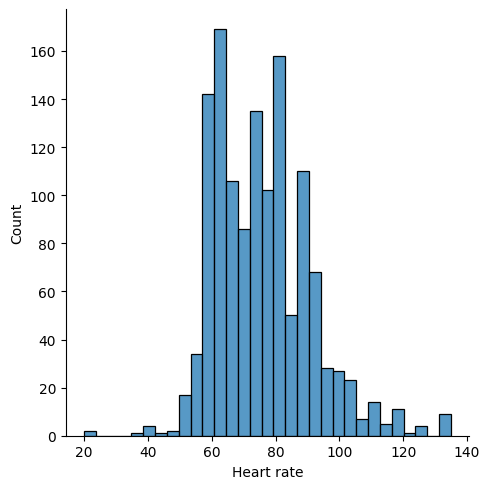

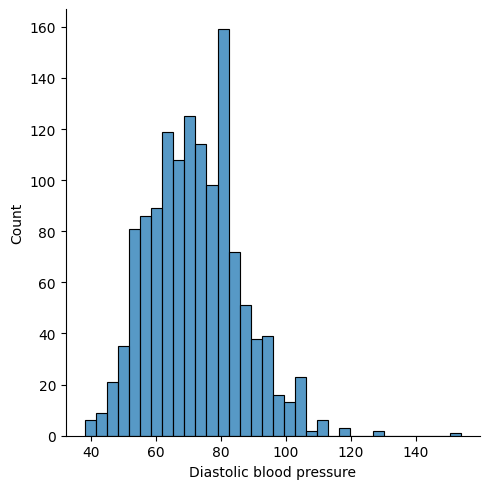

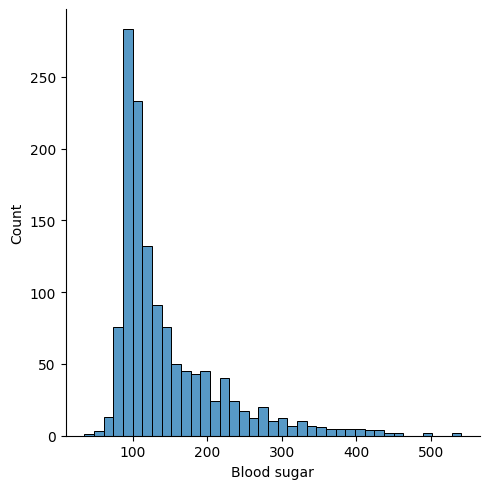

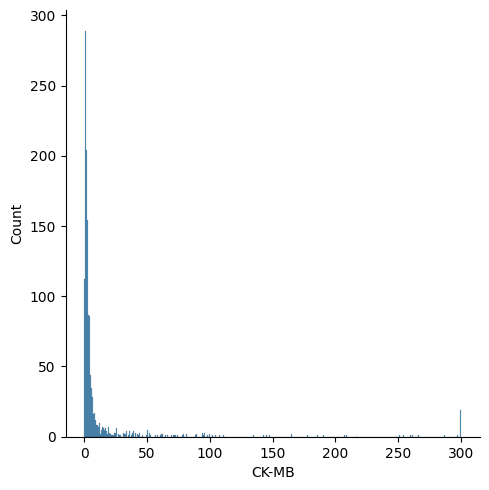

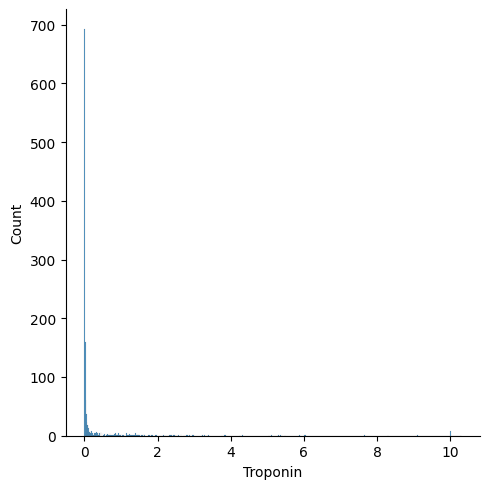

In [26]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.displot(data[col])

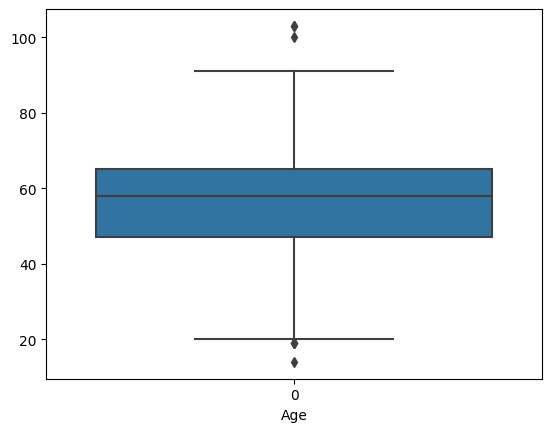

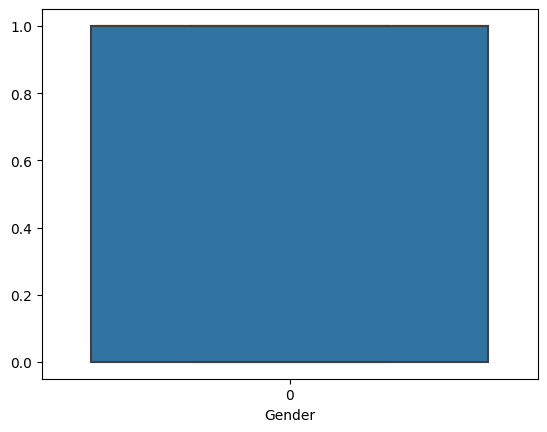

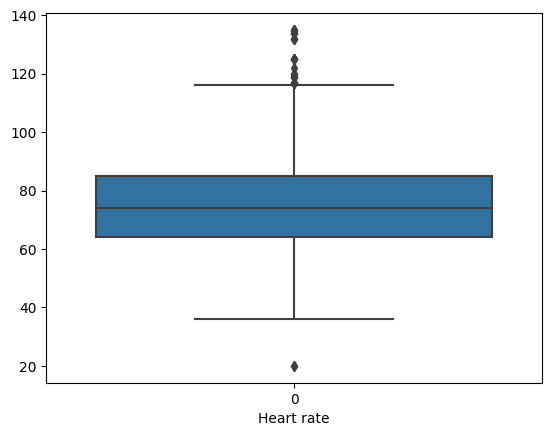

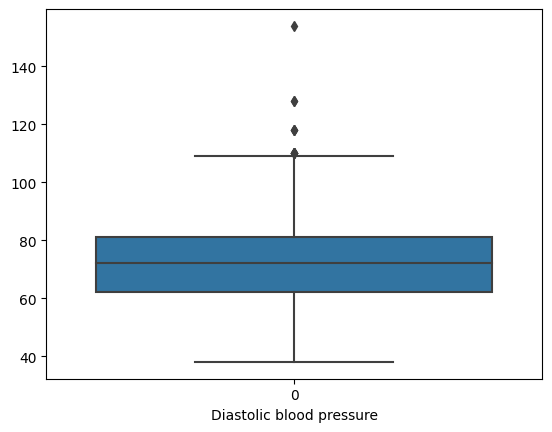

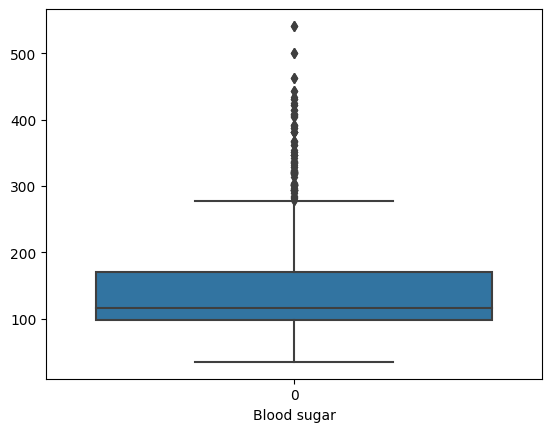

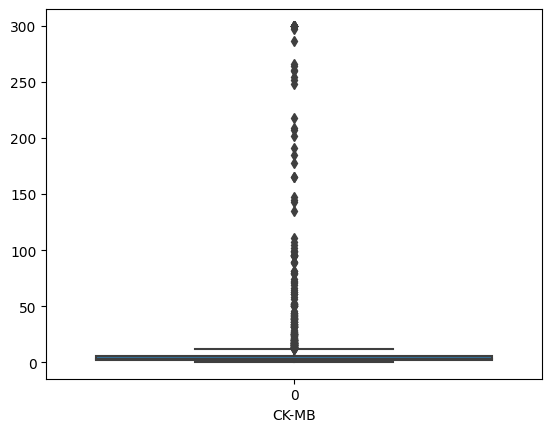

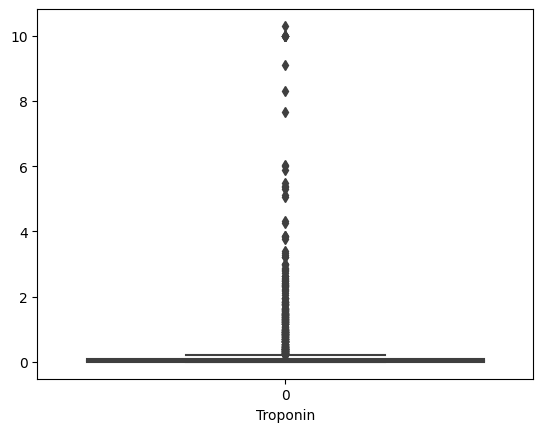

In [28]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()

# Preprocessing

In [17]:
# nettoyage des outliers
data_clean = data.copy()
for col in data_clean.select_dtypes(['int','float']).columns:
    print(col)
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
    data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]

Age
Gender
Heart rate
Systolic blood pressure
Diastolic blood pressure
Blood sugar
CK-MB
Troponin


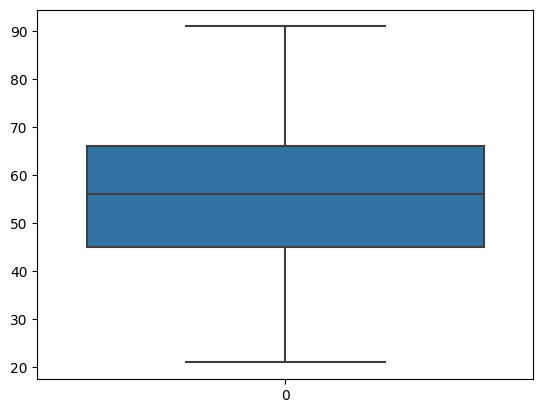

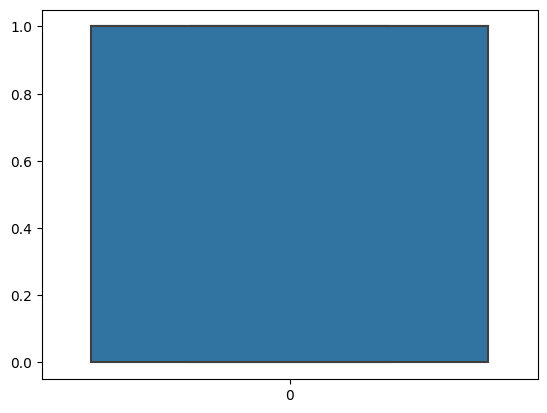

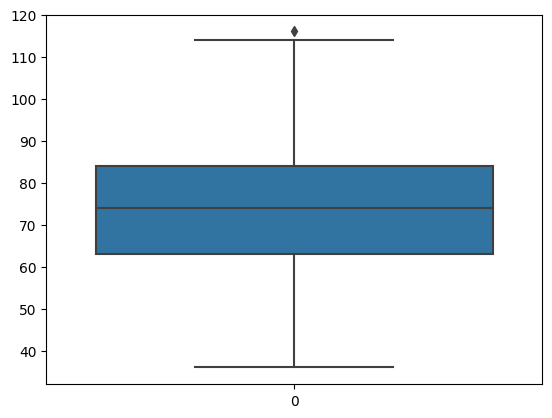

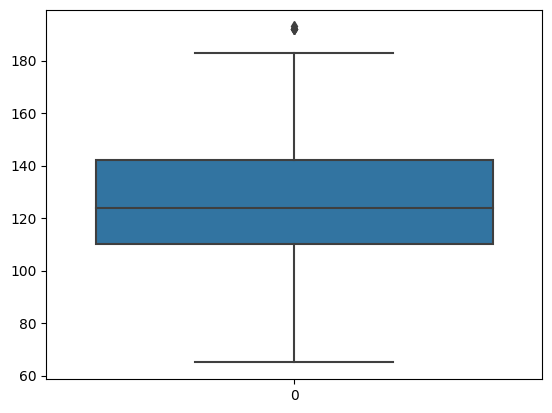

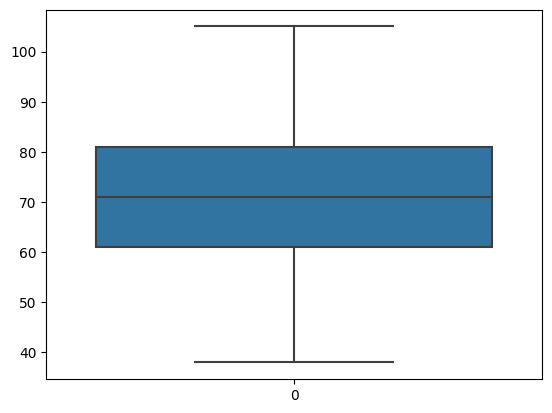

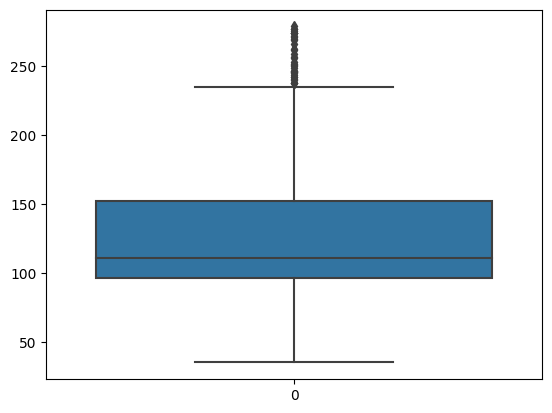

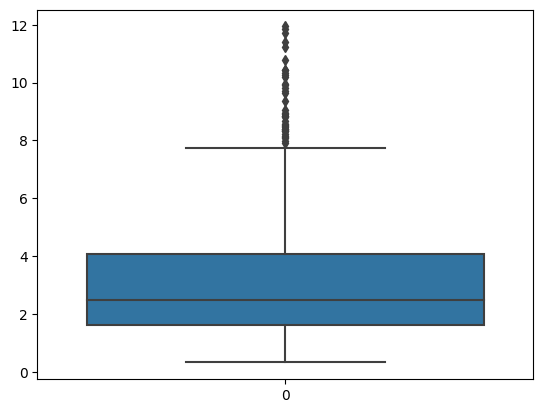

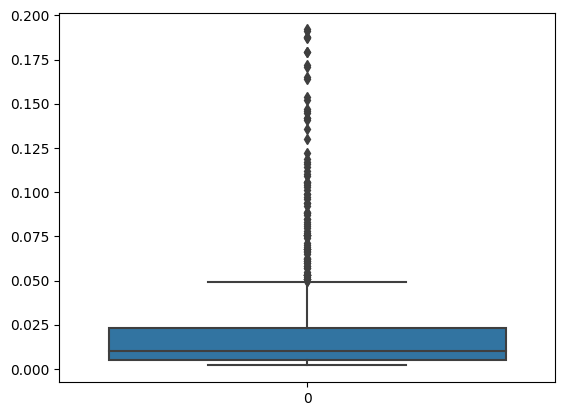

In [18]:
# visualisation de l'après nettoyage
for col in data_clean.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data_clean[col])
    plt.show()

In [19]:
# encodage des variables 


## Choix des variables à conserver pour les modèles

# Preprocessing 2

In [20]:
x_data = data.drop(columns = ['Systolic blood pressure','Result'])

In [21]:
x_data.head()

,Age,Gender,Heart rate,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,83,160.0,1.80,0.012
1,21,1,94,46,296.0,6.75,1.060
2,55,1,64,77,270.0,1.99,0.003
3,64,1,70,55,270.0,13.87,0.122
4,55,1,64,65,300.0,1.08,0.003


Formule pour calculer la FCM (fréquence cardiaque maximale) :  
Homme : ```FCM = 220 - votre âge```  
Femme : ```FCM = 226 - votre âge```  
Source : <a href="https://www.decathloncoach.com/fr/home/advices/advice/frequence-cardiaque-reserve-repos-et-maximale">Décathlon coach</a>

Autre formule pour calculer sa FCM (fréquence cardiaque maximale) :  
```FCM = 207 – 0,7 x âge```  
Source : <a href="https://www.irbms.com/calculer-sa-frequence-cardiaque-pour-un-effort/">IRBMS</a>

In [22]:
#Calculer si les BPM sont possibles
x_data['BPM_possible'] = False
x_data.loc[x_data['Heart rate']<= 207 - (0.7*x_data['Age']), 'BPM_possible'] = True

In [23]:
x_data.loc[x_data['BPM_possible'] == False]

,Age,Gender,Heart rate,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,BPM_possible
63,45,1,1111,95,109.0,1.33,1.010,False
717,70,0,1111,95,138.0,3.87,0.028,False
1069,32,0,1111,95,82.0,2.66,0.008,False


In [25]:
data = x_data.loc[x_data['BPM_possible']==True]

# Application des modèles

### Présentation des modèles

In [24]:
mdl = ["DecisionTree", "RandomForest", "Adaboost", "SVM", "KNN", "Naif"]